In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


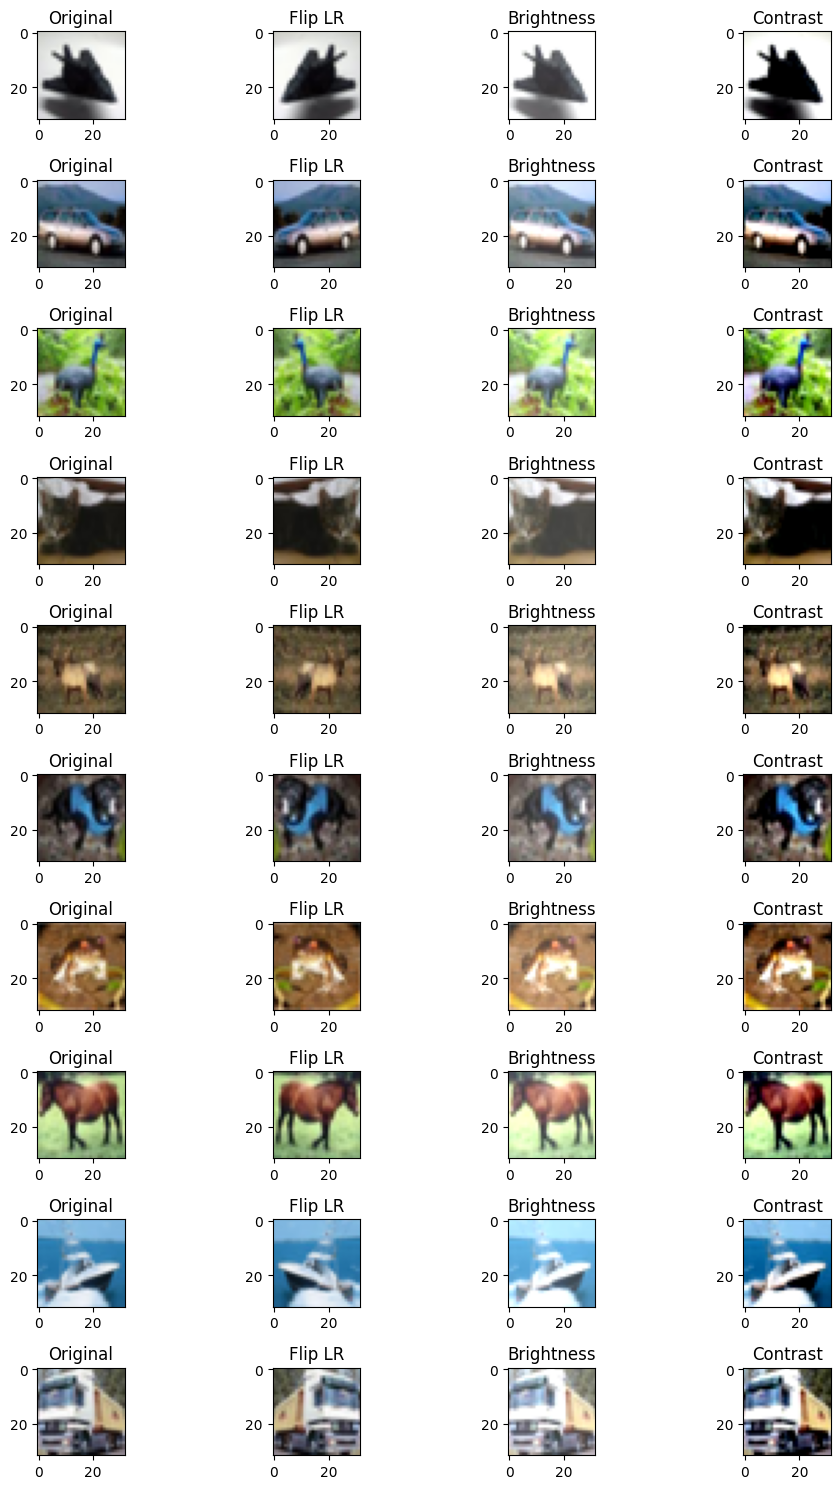

In [7]:
def create_augmentations(image):
    augmentations = []
    augmentations.append(("Flip LR", tf.image.flip_left_right(image)))
    augmentations.append(("Brightness", tf.image.adjust_brightness(image, delta=0.2)))
    augmentations.append(("Contrast", tf.image.adjust_contrast(image, contrast_factor=1.5)))
    return augmentations

num_classes = 10
selected_images = []
for class_idx in range(num_classes):
    idx = np.where(y_train == class_idx)[0][0]
    selected_images.append(x_train[idx])

augmented_images = []
for image in selected_images:
    aug_images = create_augmentations(image)
    augmented_images.append((image, aug_images))

plt.figure(figsize=(10, 15))
for i, (original_image, augmentations) in enumerate(augmented_images):
    plt.subplot(num_classes, 4, i*4 + 1)
    plt.imshow(original_image)
    plt.title("Original")
    for j, (augmentation_name, augmented_image) in enumerate(augmentations):
        plt.subplot(num_classes, 4, i*4 + j + 2)
        plt.imshow(augmented_image)
        plt.title(augmentation_name)

plt.tight_layout()
plt.show()
